In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import os
import statistics

In [76]:
def log_detailed_calculation(magnetic_field):
    return (magnetic_field > 1 and magnetic_field < 1.0001)

def Temp(J, temperature, magnetic_field):
    if (log_detailed_calculation(magnetic_field)):
        print(f"Temperatures [{temperature}] Magnetic Field [{magnetic_field}]")
    Z = (                                                          
        1 + 
        np.exp(8 * J / (temperature)) + 
        (
            2 * 
            np.cosh(2 * magnetic_field / (temperature))
        )
    )    
    term1 = (np.log(Z))
    
    
    numerator = ((                
            ( (-1)*
                8 * J * 
                np.exp(8 * J / (temperature))
            ) + 
            ( (-1)*
                4 * magnetic_field * 
                np.sinh(2 * magnetic_field / (temperature))
            )
        )/temperature)
    
    denominator = Z
    term2 =  numerator / denominator
    calculated_temperature = term1 + term2
    if (log_detailed_calculation(magnetic_field)):
        print(f"Temperatures [{temperature}] Magnetic Field [{magnetic_field}] result[{calculated_temperature}]")
        
    return calculated_temperature


def Entropia(hi, hf, INTERVAL, temperature_guess):
    
    B = np.linspace(hi, hf, INTERVAL)
    S_values = np.zeros_like(B)
    T_values = np.zeros_like(B)
    B_values = np.zeros_like(B)
    temperatures = []
    


    for i, magnetic_field in enumerate(B):
        if (log_detailed_calculation(magnetic_field)):
            print(f"========== MAGNETIC FIELD = {magnetic_field} ==========")
        try:
            
            calculated_temperature = fsolve(lambda temperature: Temp(J, temperature, magnetic_field), temperature_guess)
            T_val = calculated_temperature[0]
            
            
            if (log_detailed_calculation(magnetic_field)):
                print(f"Final Result={T_val}")
            
            #Update temperature guess with the result of previuos systems
            temperature_guess = T_val
            
            T_values[i] = T_val
            B_values[i] = magnetic_field
            S_values[i] = Temp(J, T_values[i], B_values[i])
            
            print(magnetic_field)
            #print(f"i: {i} | Calculated_temperature:{calculated_temperature} | T_values[i]: {T_values[i]} | B_values[i]: {B_values[i]} | S_values[i]: {S_values[i]}. ")
            
            #Append the system result to the list of temperatures to be plotted
            temperatures.append(T_val)  # Adiciona o valor encontrado para T
            
        except RuntimeWarning:
            temperatures.append(np.nan)  # Se houver erro, adiciona NaN para evitar falha
        if (log_detailed_calculation(magnetic_field)):
            print(f"========== MAGNETIC FIELD = {magnetic_field} ==========")
        
        
    #Plotando os gráficos
    plt.figure(figsize=(12, 5))

    # Gráfico B vs T
    plt.subplot(1, 2, 1)
    plt.plot(B_values, T_values, 'b-')
    plt.xlabel('B')
    plt.ylabel('T')
    plt.title('B vs T')
    plt.grid(True)

    # Gráfico B vs S
    plt.subplot(1, 2, 2)
    plt.plot(B_values, S_values, 'r-')
    plt.xlabel('B')
    plt.ylabel('S')
    plt.title('B vs S')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

/tmp/ipykernel_16813/4041840106.py:53: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  calculated_temperature = fsolve(lambda temperature: Temp(J, temperature, magnetic_field), temperature_guess)
/tmp/ipykernel_16813/4041840106.py:9: RuntimeWarning: overflow encountered in exp
  np.exp(8 * J / (temperature)) +
/tmp/ipykernel_16813/4041840106.py:21: RuntimeWarning: overflow encountered in exp
  np.exp(8 * J / (temperature))
/tmp/ipykernel_16813/4041840106.py:30: RuntimeWarning: invalid value encountered in divide
  term2 =  numerator / denominator
/tmp/ipykernel_16813/4041840106.py:18: RuntimeWarning: overflow encountered in divide
  numerator = ((
/tmp/ipykernel_16813/4041840106.py:12: RuntimeWarning: overflow encountered in cosh
  np.cosh(2 * magnetic_field / (temperature))
/tmp/ipykernel_16813/4041840106.py:25: RuntimeWarning: overflow encountered in sinh
  np.sinh(2 * magnetic_field / (temperature))
/tmp/ipy

1.0
1.0101010101010102
1.02020202020202
1.0303030303030303
1.0404040404040404
1.0505050505050506
1.0606060606060606
1.0707070707070707
1.0808080808080809
1.0909090909090908
1.101010101010101
1.1111111111111112
1.121212121212121
1.1313131313131313
1.1414141414141414
1.1515151515151516
1.1616161616161615
1.1717171717171717
1.1818181818181819
1.191919191919192
1.202020202020202
1.2121212121212122
1.2222222222222223
1.2323232323232323
1.2424242424242424
1.2525252525252526
1.2626262626262625
1.2727272727272727
1.2828282828282829
1.2929292929292928
1.303030303030303
1.3131313131313131
1.3232323232323233
1.3333333333333335
1.3434343434343434
1.3535353535353536
1.3636363636363638
1.3737373737373737
1.3838383838383839
1.393939393939394
1.404040404040404
1.4141414141414141
1.4242424242424243
1.4343434343434343
1.4444444444444444
1.4545454545454546
1.4646464646464648
1.474747474747475
1.4848484848484849
1.494949494949495
1.5050505050505052
1.5151515151515151
1.5252525252525253
1.5353535353535355


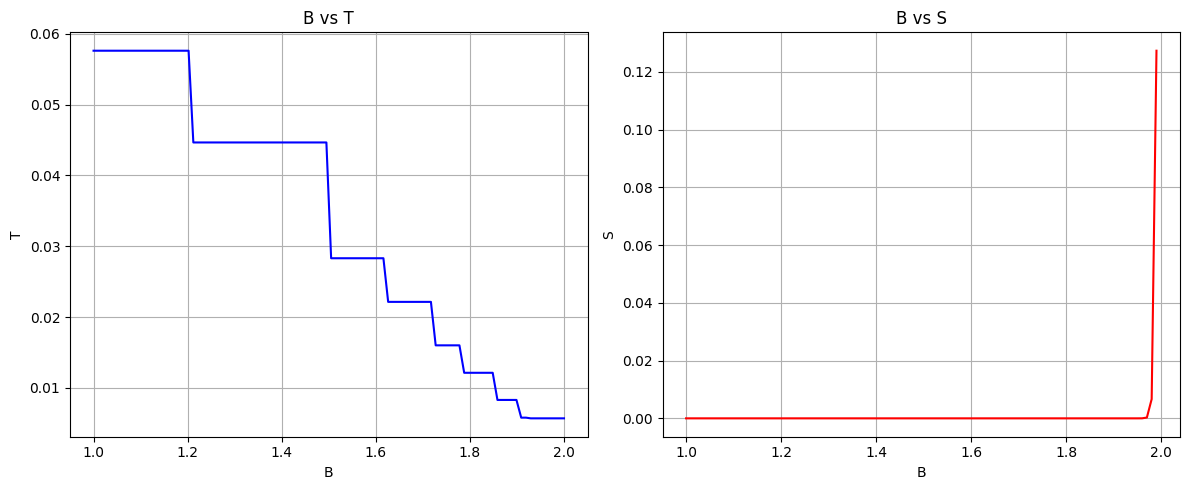

In [77]:
J = 0.5
hi = 1
hf = 2
INTERVAL = 100
temperature_guess = 1

Entropia(hi,hf, INTERVAL, temperature_guess)